In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython import display

from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:

class memristor():
    
    def __init__(self, Von = -3, Voff = 3, Ron=300000, Roff=30000000, L=3*10**(-6), Kon=-70*10**(-6), Koff=20*10**(-6), Aon=0.1, Aoff=1, a_on = 1.5*10**(-6), a_off = 1.2*10**(-9), x_c = 100, x_c_on = 10**(-6)):
    
        self.V_on = Von
        self.V_off = Voff
        self.R_on = Ron
        self.R_off = Roff
        self.x_off = L
        self.x_on = 0
        self.x = 0.5*10**(-6)
        self.K_on=Kon
        self.K_off=Koff
        self.Alpha_on=Aon
        self.Alpha_off=Aoff
        self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/self.x_off) * self.R_on
        self.G_norm = 1/Ron - 1/Roff
        self.a_on = a_on
        self.a_off = a_off
        self.x_c = x_c
        self.x_c_on = x_c_on
        
    def Res(self, InVolt, dt):
        
            if (InVolt >= self.V_off):
    
                dxdt = self.K_off*((InVolt/self.V_off-1)**self.Alpha_off)
    
            if (InVolt <= self.V_on):
    
                dxdt = self.K_on*((InVolt/self.V_on-1)**self.Alpha_on)
    
            if ((self.V_on < InVolt) and (InVolt < self.V_off)):
  
                dxdt=0
  
    
            if (InVolt >= 0):
           
                self.x = self.x + dt*dxdt*np.exp(-np.exp((self.x - self.a_off)/self.x_c))
              #  self.x = self.x + dt* dxdt
        
        
            if (InVolt < 0):
       
                self.x = self.x + dt*dxdt*np.exp(-np.exp((self.a_on - self.x)/self.x_c_on));
               # self.x = self.x + dt* dxdt
            
            if (self.x>=self.x_off):

                dxdt=0
                self.x = self.x_off
    
            if (self.x<=self.x_on):
    
                dxdt = 0
                self.x = self.x_on
    
            #return self.R_on + (self.x - self.x_on)*(self.R_off - self.R_on)/(self.x_off - self.x_on)
            self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/(self.x_off - self.x_on)) * self.R_on
    
    def update(self, R: float):
    
        self.R = R

    def reset(self):  
         
        self.x = 0.5*10**(-6)
        self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/(self.x_off - self.x_on)) * self.R_on
    

In [3]:
dt = 0.2

memr = memristor()

impulse_length = 70.0  #длительность импулсьа
impulse_amplitude = 4
#impulse_amplitude_2 = 2.1

#k = 0.5

In [4]:
def impulse_curve(t ,impulse_length, impulse_amplitude):
     
    return  ((4*impulse_amplitude/impulse_length) * t - impulse_amplitude)*(t<impulse_length/2) + (-(4*impulse_amplitude/impulse_length) * t + 3*impulse_amplitude)*(t>=impulse_length/2)

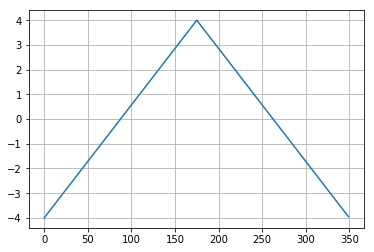

In [5]:
ar = []

for i in range(int(impulse_length/dt)):
    #if i:
    #    ar.append(impulse_curve_2(i * dt, dt) * dt + ar[i-1])
    #else:
    #    ar.append(impulse_curve_2(i * dt, dt) * dt)
    t = i * dt
    
    ar.append(impulse_curve(t, impulse_length, impulse_amplitude))
    #print(i*dt,'\n')
    
      
#print(ar)    
plt.figure()
plt.plot(np.arange(int(impulse_length/dt)), ar)
plt.grid()
plt.show()
ar.clear()

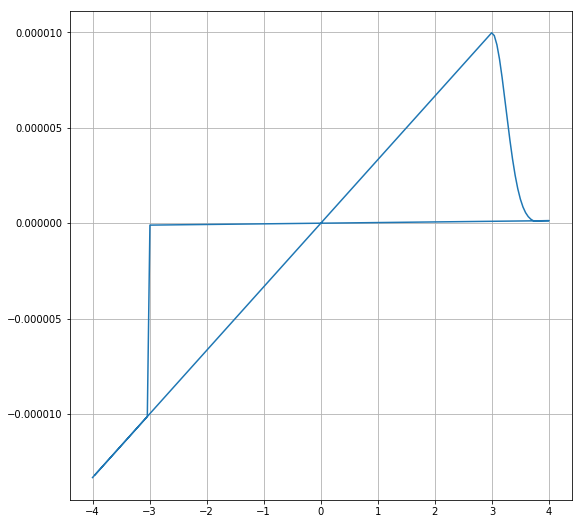

In [6]:
   
    pi = 3.1415
    
    Volt_arch_3 = []
    I_arch_3 = []

    for count in range( 0 , int(impulse_length/dt)):
    
            t = count * dt
            
            V = impulse_curve(t ,impulse_length, impulse_amplitude)#np.sin(t*2*pi/impulse_length)
            
            Volt_arch_3.append(V)
            # R_arch.append(memr.R)
            
            memr.Res(V , dt)
        
            I_arch_3.append(V/memr.R)
            
            fig = plt.figure(figsize=(9, 9))
            plt.plot(Volt_arch_3, I_arch_3)
            plt.grid()
              
            display.clear_output(wait=True)
            display.display(fig, display_id = 'vamp')
    
            plt.close(fig)   
                             
    memr.reset()     

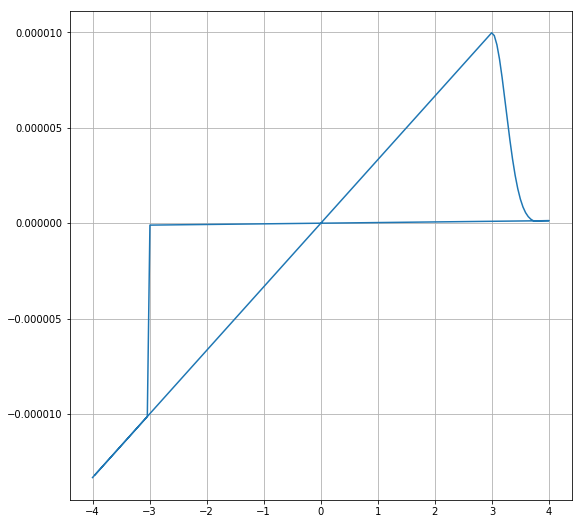

In [ ]:
   #ВАХ при синусоиде
    
    pi = 3.1415/impulse_length
    
    Volt_arch_3 = []
    I_arch_3 = []

    for count in range( 0 , int(impulse_length/dt)):
    
            t = count * dt
            
            V = impulse_amplitude * np.sin(t*2*pi)
            
            Volt_arch_3.append(V)
            # R_arch.append(memr.R)
            
            memr.Res(V , dt)
        
            I_arch_3.append(V/memr.R)
            
            fig_1 = plt.figure(figsize=(9, 9))
            plt.plot(Volt_arch_3, I_arch_3)
            plt.grid()
              
            display.clear_output(wait=True)
            display.display(fig, display_id = 'vamp')
    
            plt.close(fig_1)   
                             
    memr.reset()           

def impulse_curve(t, dt, impulse_length, impulse_amplitude):
    

for count in range( 0 , int(impulse_length/dt)):

        t = count * dt

        V = impulse_curve(count , dt, impulse_length, impulse_amplitude)

        Volt_arch_2.append(V)
        # R_arch.append(memr.R)

        memr.Res(V , dt)

        I_arch_2.append(V/memr.R)

        fig_2 = plt.figure(figsize=(9, 9))
        plt.plot(Volt_arch_2, I_arch_2)
        plt.grid()

        display.clear_output(wait=True)
        display.display(fig_2, display_id = 'vamp2')

        plt.close(fig_2)   

memr.reset() 